<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/torchserve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Torchserve 官方手册 https://pytorch.org/serve/index.html

github官方地址 https://github.com/pytorch/serve.git

更多：

- https://pytorch.org/serve/server.html
- https://github.com/pytorch/serve/blob/master/docs/configuration.md



# 安装依赖

In [44]:
!python -V
!java --version

Python 3.10.12
openjdk 11.0.21 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [6]:
!pip install torchserve torch-model-archiver torch-workflow-archiver


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 55.0 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/pytorch/serve.git


Cloning into 'serve'...
remote: Enumerating objects: 48880, done.
remote: Counting objects: 100% (1674/1674), done.
remote: Compressing objects: 100% (771/771), done.
remote: Total 48880 (delta 1045), reused 1375 (delta 810), pack-reused 47206
Receiving objects: 100% (48880/48880), 84.75 MiB | 29.81 MiB/s, done.
Resolving deltas: 100% (30152/30152), done.


In [7]:
!cd serve && python ./ts_scripts/install_dependencies.py


javac 11.0.21
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
Ignoring numpy: markers 'sys_platform == "win32"' don't match your environment


# 下载模型本地存放

In [8]:
!mkdir -p model_store


In [9]:
!wget https://download.pytorch.org/models/densenet161-8d451a50.pth

--2023-12-10 12:54:46--  https://download.pytorch.org/models/densenet161-8d451a50.pth
Resolving download.pytorch.org (download.pytorch.org)... 18.160.10.28, 18.160.10.76, 18.160.10.36, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.160.10.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115730790 (110M) [application/x-www-form-urlencoded]
Saving to: ‘densenet161-8d451a50.pth’

densenet161-8d451a5 100%[===================>] 110.37M   235MB/s    in 0.5s    

2023-12-10 12:54:46 (235 MB/s) - ‘densenet161-8d451a50.pth’ saved [115730790/115730790]



In [27]:
# https://github.com/pytorch/serve/tree/master/model-archiver
!torch-model-archiver --model-name densenet161 --version 1.0 \
  --model-file ./serve/examples/image_classifier/densenet_161/model.py \
  --serialized-file densenet161-8d451a50.pth --export-path model_store \
  --extra-files ./serve/examples/image_classifier/index_to_name.json \
  --handler image_classifier \
  --version 1.0 \
  -f


WARNING - Overwriting model_store/densenet161.mar ...


In [28]:
!ls -lh model_store/

total 106M
-rw-r--r-- 1 root root 106M Dec 10 15:43 densenet161.mar


# 加载模型启动服务

## http

In [25]:
# https://github.com/pytorch/serve/blob/master/docs/configuration.md
!cat config.properties

inference_address=http://0.0.0.0:9080
management_address=http://0.0.0.0:9081
metrics_address=http://0.0.0.0:9082


In [ ]:
# use default pathlib
!pip uninstall pathlib

In [56]:
!nohup torchserve --start  --ts-config ./config.properties --model-store model_store --models densenet161.mar &

nohup: appending output to 'nohup.out'


In [58]:
!head -100 nohup.out

Removing orphan pid file.
2023-12-10T14:13:02,196 [WARN ] main org.pytorch.serve.util.ConfigManager - Your torchserve instance can access any URL to load models. When deploying to production, make sure to limit the set of allowed_urls in config.properties
2023-12-10T14:13:02,200 [INFO ] main org.pytorch.serve.servingsdk.impl.PluginsManager - Initializing plugins manager...
2023-12-10T14:13:02,296 [INFO ] main org.pytorch.serve.metrics.configuration.MetricConfiguration - Successfully loaded metrics configuration from /usr/local/lib/python3.10/dist-packages/ts/configs/metrics.yaml
2023-12-10T14:13:02,416 [INFO ] main org.pytorch.serve.ModelServer - 
Torchserve version: 0.9.0
TS Home: /usr/local/lib/python3.10/dist-packages
Current directory: /content
Temp directory: /tmp
Metrics config path: /usr/local/lib/python3.10/dist-packages/ts/configs/metrics.yaml
Number of GPUs: 0
Number of CPUs: 2
Max heap size: 3246 M
Python executable: /usr/bin/python3
Config file: ./config.properties
Inferenc

In [18]:
!ls -hl logs
!ls -hl logs/config

total 352K
-rw-r--r-- 1 root root  222 Dec 10 15:02 access_log.log
drwxr-xr-x 2 root root 4.0K Dec 10 14:13 config
-rw-r--r-- 1 root root  28K Dec 10 15:02 model_log.log
-rw-r--r-- 1 root root  702 Dec 10 15:02 model_metrics.log
-rw-r--r-- 1 root root 246K Dec 10 15:06 ts_log.log
-rw-r--r-- 1 root root  51K Dec 10 15:06 ts_metrics.log
total 60K
-rw-r--r-- 1 root root 606 Dec 10 13:06 20231210130657574-shutdown.cfg
-rw-r--r-- 1 root root 649 Dec 10 13:08 20231210130839490-shutdown.cfg
-rw-r--r-- 1 root root 706 Dec 10 13:20 20231210132035199-startup.cfg
-rw-r--r-- 1 root root 707 Dec 10 13:20 20231210132057479-shutdown.cfg
-rw-r--r-- 1 root root 743 Dec 10 13:21 20231210132128669-startup.cfg
-rw-r--r-- 1 root root 744 Dec 10 13:21 20231210132140446-shutdown.cfg
-rw-r--r-- 1 root root 744 Dec 10 13:26 20231210132643321-startup.cfg
-rw-r--r-- 1 root root 745 Dec 10 13:41 20231210134151696-shutdown.cfg
-rw-r--r-- 1 root root 744 Dec 10 13:46 20231210134659442-startup.cfg
-rw-r--r-- 1 root 

In [59]:
#inference
!lsof -i:9080
#managemet
!lsof -i:9081
#metrics
!lsof -i:9082
#grpc
!lsof -i:7070
!lsof -i:7071

COMMAND   PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    22836 root   48u  IPv4 529713      0t0  TCP *:9080 (LISTEN)
COMMAND   PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    22836 root   51u  IPv4 529716      0t0  TCP *:9081 (LISTEN)
COMMAND   PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    22836 root   53u  IPv4 529719      0t0  TCP *:9082 (LISTEN)
COMMAND   PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    22836 root   11u  IPv4 529730      0t0  TCP *:7070 (LISTEN)
COMMAND   PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    22836 root   66u  IPv4 529760      0t0  TCP *:7071 (LISTEN)


## https
https验证支持使用 Java 密钥库或证书。这里选择后者。



In [29]:
# 使用 openssl 创建一个证书和一个私有密钥。

!openssl req -x509 -nodes -days 365 -newkey rsa:2048 -keyout mykey.key -out mycert.pem


...........+......+.........+............+...+..+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++*.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++*...+.......+......+..+...+....+.....+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
....+...+............+......+...+............+..+...+....+...+..+.........+....+...........+............+....+...............+...+...+..+.+.....+......+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++*..+....+...+...+..+...............+............+......+....+.....+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++*...+..+.+..+...+....+........+...+....+.........+..+....+..............+.+.....+......+.........+.............+...+...+.....+....+..+....+..+....+........+.+......+...+...+............+.....+......+.........+...+..........+....................+...+....+......+.........+............+.........+..+.......+.....+.+...............+..+.........+..........+......+.....+..

In [31]:
!ls -lh mykey.key mycert.pem

-rw-r--r-- 1 root root 1.4K Dec 10 15:50 mycert.pem
-rw------- 1 root root 1.7K Dec 10 15:49 mykey.key


In [34]:
!cat config-https.properties

inference_address=https://127.0.0.1:8443
management_address=https://127.0.0.1:8444
metrics_address=https://127.0.0.1:8445
private_key_file=mykey.key
certificate_file=mycert.pem


In [ ]:
# 重新启动 TorchServe，然后就可以使用 HTTPS 调用它了。由于使用了自签名证书，需要将“–insecure”标志传递给 curl。
#!curl --insecure -X POST https://本地IP:8443/predictions/xxx -T xxx

# 从模型中获取预测
要测试模型服务器，请向服务器的 API 发送请求predictions。TorchServe通过gRPC和HTTP/REST支持所有推理和管理api 。



## http RESTful 方式调用api

In [25]:
!curl "http://localhost:9081/models"
!curl "http://localhost:9081/models/densenet161"


{
  "models": [
    {
      "modelName": "densenet161",
      "modelUrl": "densenet161.mar"
    }
  ]
}
[
  {
    "modelName": "densenet161",
    "modelVersion": "1.0",
    "modelUrl": "densenet161.mar",
    "runtime": "python",
    "minWorkers": 2,
    "maxWorkers": 2,
    "batchSize": 1,
    "maxBatchDelay": 100,
    "loadedAtStartup": true,
    "workers": [
      {
        "id": "9000",
        "startTime": "2023-12-10T14:13:04.649Z",
        "status": "READY",
        "memoryUsage": 602808320,
        "pid": 22876,
        "gpu": false,
        "gpuUsage": "N/A"
      },
      {
        "id": "9001",
        "startTime": "2023-12-10T14:13:04.651Z",
        "status": "READY",
        "memoryUsage": 602390528,
        "pid": 22875,
        "gpu": false,
        "gpuUsage": "N/A"
      }
    ],
    "jobQueueStatus": {
      "remainingCapacity": 100,
      "pendingRequests": 0
    }
  }
]


In [ ]:
# curl -X DELETE "http://localhost:9081/models/模型名称"
# curl -X POST "http://localhost:9081/models?url=添加的模型名称.mar"
# curl "http://localhost:9081/models/模型名称"
# curl -v -X PUT "http://localhost:8081/models/模型名称?min_worker=2"



In [15]:
!curl -O https://raw.githubusercontent.com/pytorch/serve/master/docs/images/kitten_small.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7341  100  7341    0     0  40196      0 --:--:-- --:--:-- --:--:-- 40335


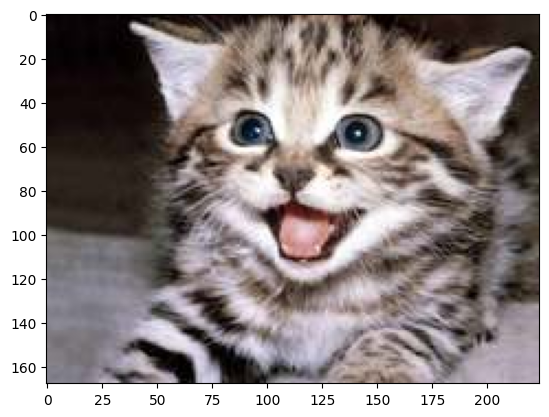

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('kitten_small.jpg')
plt.imshow(img)
plt.show()


In [16]:
!curl http://127.0.0.1:9080/predictions/densenet161 -T kitten_small.jpg

{
  "tabby": 0.4781670570373535,
  "lynx": 0.20013388991355896,
  "tiger_cat": 0.168229341506958,
  "tiger": 0.06191267445683479,
  "Egyptian_cat": 0.05113618075847626
}

## grpc 方式调用api

In [2]:
# 安装 grpc python 依赖项：
!pip install --no-cache-dir grpcio protobuf==3.20.3 grpcio-tools


In [4]:
!git clone https://github.com/googleapis/googleapis.git

Cloning into 'googleapis'...
remote: Enumerating objects: 216533, done.
remote: Counting objects: 100% (2493/2493), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 216533 (delta 2322), reused 2331 (delta 2272), pack-reused 214040
Receiving objects: 100% (216533/216533), 192.68 MiB | 20.71 MiB/s, done.
Resolving deltas: 100% (183947/183947), done.


In [5]:
!ls /content/googleapis/google/rpc

BUILD.bazel  context		  http.proto  rpc_publish.yaml
code.proto   error_details.proto  README.md   status.proto


In [10]:
#使用 proto 文件生成推理客户端
!cd serve && python -m grpc_tools.protoc \
  --proto_path=frontend/server/src/main/resources/proto/ \
  --proto_path=/content/googleapis/ \
  --python_out=ts_scripts \
  --grpc_python_out=ts_scripts \
  frontend/server/src/main/resources/proto/inference.proto \
  frontend/server/src/main/resources/proto/management.proto


/usr/local/lib/python3.10/dist-packages/grpc_tools/protoc.py:21: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [13]:
!cd serve && git status -s

?? ts_scripts/inference_pb2.py
?? ts_scripts/inference_pb2_grpc.py
?? ts_scripts/management_pb2.py
?? ts_scripts/management_pb2_grpc.py


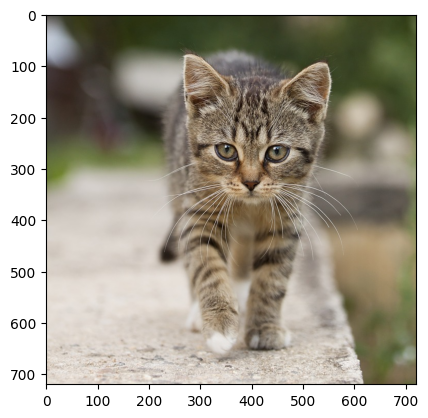

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('serve/examples/image_classifier/kitten.jpg')
#plt.figure("kitten")
plt.imshow(img)
plt.show()


In [14]:
# 使用示例客户端gRPC python 客户端运行推理
!cd serve && python ts_scripts/torchserve_grpc_client.py infer densenet161 examples/image_classifier/kitten.jpg


{
  "tabby": 0.46661895513534546,
  "tiger_cat": 0.46449047327041626,
  "Egyptian_cat": 0.06614057719707489,
  "lynx": 0.0012924452312290668,
  "plastic_bag": 0.00022909804829396307
}


# benchmark

https://github.com/pytorch/serve/blob/master/benchmarks/README.md

In [36]:
!cd serve/benchmarks && pip install -r requirements-ab.txt


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 21.0 MB/s eta 0:00:00
  Created wheel for mdutils: filename=mdutils-1.4.0-py3-none-any.whl size=19923 sha256=4e9af2922b49fb356064bcd14f0477288b8a1f511a99a1cc8a3835e84b6dd346
  Stored in directory: /root/.cache/pip/wheels/b5/98/56/eb827ded378c3d00fb9cdaf2760c1dd42b36a32acda4184945
Successfully built mdutils


In [37]:
!apt-get install apache2-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1
The following NEW packages will be installed:
  apache2-utils libapr1 libaprutil1
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 290 kB of archives.
After this operation, 992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libapr1 amd64 1.7.0-8ubuntu0.22.04.1 [108 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libaprutil1 amd64 1.6.1-5ubuntu4.22.04.2 [92.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apache2-utils amd64 2.4.52-1ubuntu4.7 [88.8 kB]
Fetched 290 kB in 0s (2,213 kB/s)
Selecting previously unselected package libapr1:amd64.
(Reading database ... 120899 files and directories currently installed.)
Preparing to unpack .../libapr1_1.7.0-8ubuntu0.22.04.1_amd64.deb ...
Unpacking liba

# test

https://github.com/pytorch/serve/blob/master/examples/image_classifier/resnet_18/README.md#debug-torchserve-backend


# 停止服务

In [38]:
!torchserve --stop

TorchServe has stopped.


In [39]:
!ps -ef | grep java

root       55603   30372  0 16:25 ?        00:00:00 /bin/bash -c ps -ef | grep java
root       55605   55603  0 16:25 ?        00:00:00 grep java


In [40]:
#inference
!lsof -i:9080
#managemet
!lsof -i:9081
#metrics
!lsof -i:9082
#grpc
!lsof -i:7070
!lsof -i:7071